In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Load Data
## Load test data
test_data_path = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
df_test = pd.read_csv(test_data_path, sep=":::", header=0, engine='python')
df_test.columns = ['SN', 'movie_name', 'summary']

In [3]:
## Load training data
train_data_path = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
df_train = pd.read_csv(train_data_path, sep=":::", header=0, engine='python')
df_train.columns = ['SN', 'movie_name', 'category', 'summary']

In [4]:
# Explore Data
## View first few rows of data
print("Test Data:")
print("------------------------------------------------------")
print(df_test.head())
print("------------------------------------------------------")
print("\nTraining Data:")
print("------------------------------------------------------")
print(df_train.head())
print("------------------------------------------------------")

Test Data:
------------------------------------------------------
   SN                     movie_name  \
0   2      La guerra de papá (1977)    
1   3   Off the Beaten Track (2010)    
2   4        Meu Amigo Hindu (2015)    
3   5             Er nu zhai (1955)    
4   6            Riddle Room (2016)    

                                             summary  
0   Spain, March 1964: Quico is a very naughty ch...  
1   One year in the life of Albin and his family ...  
2   His father has died, he hasn't spoken with hi...  
3   Before he was known internationally as a mart...  
4   Emily Burns is being held captive in a room w...  
------------------------------------------------------

Training Data:
------------------------------------------------------
   SN                          movie_name       category  \
0   2                       Cupid (1997)       thriller    
1   3   Young, Wild and Wonderful (1980)          adult    
2   4              The Secret Sin (1915)          drama  

In [5]:
## Get data information
print("\nTest Data Info:")
print("------------------------------------------------------")
print(df_test.info())
print("------------------------------------------------------")
print("\nTraining Data Info:")
print("------------------------------------------------------")
print(df_train.info())
print("------------------------------------------------------")


Test Data Info:
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   summary     54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
------------------------------------------------------

Training Data Info:
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   summary     54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
-------------------------------

In [6]:
## Get data statistics
print("\nTest Data Statistics:")
print("------------------------------------------------------")
print(df_test.describe())
print("------------------------------------------------------")
print("\nTraining Data Statistics:")
print("------------------------------------------------------")
print(df_train.describe())
print("------------------------------------------------------")


Test Data Statistics:
------------------------------------------------------
                 SN
count  54199.000000
mean   27101.000000
std    15646.047957
min        2.000000
25%    13551.500000
50%    27101.000000
75%    40650.500000
max    54200.000000
------------------------------------------------------

Training Data Statistics:
------------------------------------------------------
                 SN
count  54213.000000
mean   27108.000000
std    15650.089409
min        2.000000
25%    13555.000000
50%    27108.000000
75%    40661.000000
max    54214.000000
------------------------------------------------------


In [7]:
## Check for missing values
print("\nTest Data Missing Values:")
print("------------------------------------------------------")
print(df_test.isnull().sum())
print("------------------------------------------------------")
print("\nTraining Data Missing Values:")
print("------------------------------------------------------")
print(df_train.isnull().sum())
print("------------------------------------------------------")


Test Data Missing Values:
------------------------------------------------------
SN            0
movie_name    0
summary       0
dtype: int64
------------------------------------------------------

Training Data Missing Values:
------------------------------------------------------
SN            0
movie_name    0
category      0
summary       0
dtype: int64
------------------------------------------------------


In [8]:
## Get data count
print("\nTest Data Count:")
print("------------------------------------------------------")
print(df_test.count())
print("------------------------------------------------------")
print("\nTraining Data Count:")
print("------------------------------------------------------")
print(df_train.count())
print("------------------------------------------------------")


Test Data Count:
------------------------------------------------------
SN            54199
movie_name    54199
summary       54199
dtype: int64
------------------------------------------------------

Training Data Count:
------------------------------------------------------
SN            54213
movie_name    54213
category      54213
summary       54213
dtype: int64
------------------------------------------------------


In [9]:
## View specific rows
print("\nFirst 3 rows of Training Data:")
print("------------------------------------------------------")
print(df_train.iloc[0:3])
print("------------------------------------------------------")
print("\nFirst row of Training Data:")
print("------------------------------------------------------")
print(df_train.loc[0])
print("------------------------------------------------------")


First 3 rows of Training Data:
------------------------------------------------------
   SN                          movie_name    category  \
0   2                       Cupid (1997)    thriller    
1   3   Young, Wild and Wonderful (1980)       adult    
2   4              The Secret Sin (1915)       drama    

                                             summary  
0   A brother and sister with a past incestuous r...  
1   As the bus empties the students for their fie...  
2   To help their unemployed father make ends mee...  
------------------------------------------------------

First row of Training Data:
------------------------------------------------------
SN                                                            2
movie_name                                        Cupid (1997) 
category                                              thriller 
summary        A brother and sister with a past incestuous r...
Name: 0, dtype: object
----------------------------------------------

In [10]:
## Get data shape
print("\nTest Data Shape:", df_test.shape)
print("------------------------------------------------------")
print("Training Data Shape:", df_train.shape)


Test Data Shape: (54199, 3)
------------------------------------------------------
Training Data Shape: (54213, 4)


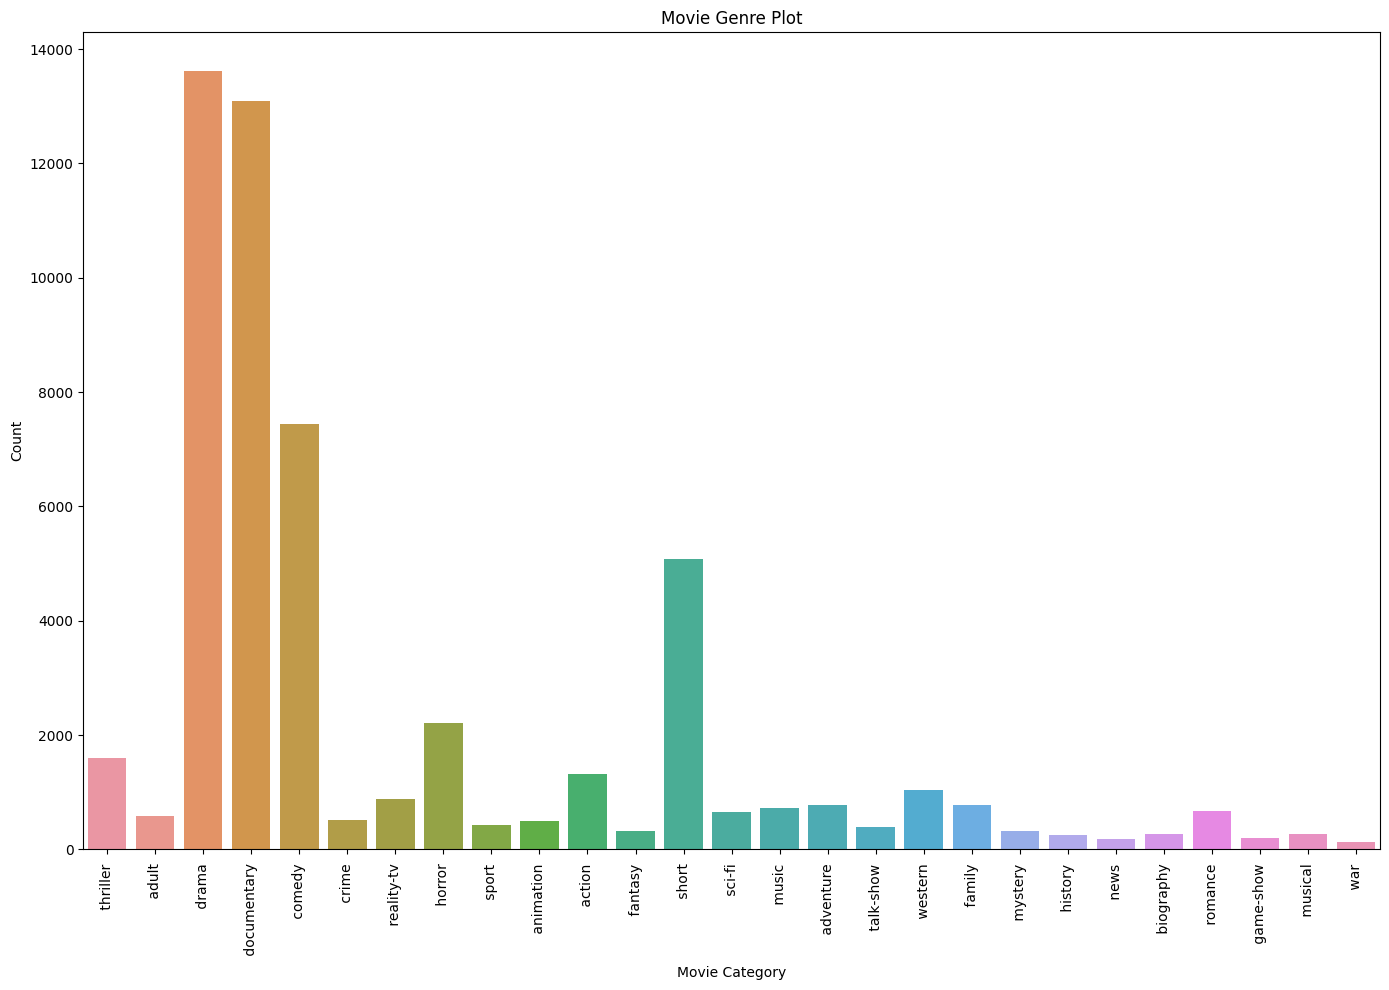

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(x='category', data=df_train, ax=ax)
ax.set_xlabel('Movie Category')
ax.set_ylabel('Count')
ax.set_title('Movie Genre Plot')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


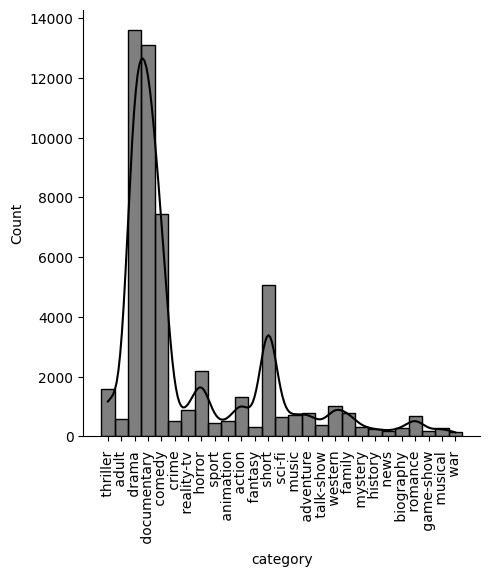

In [12]:
sns.displot(df_train.category, kde=True, color="black")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


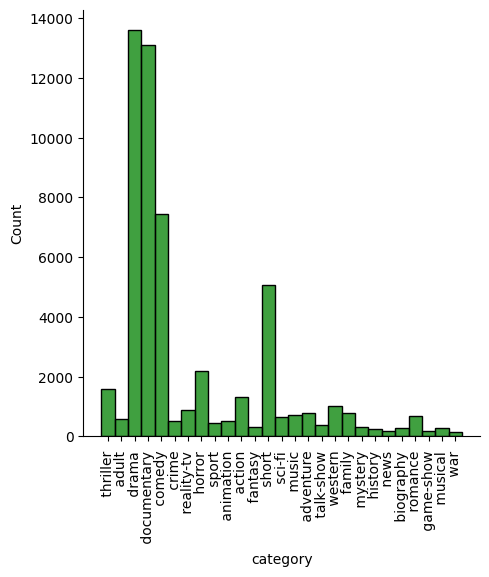

In [13]:
sns.displot(df_train.category, kde=False, color = "green")
plt.xticks(rotation=90);

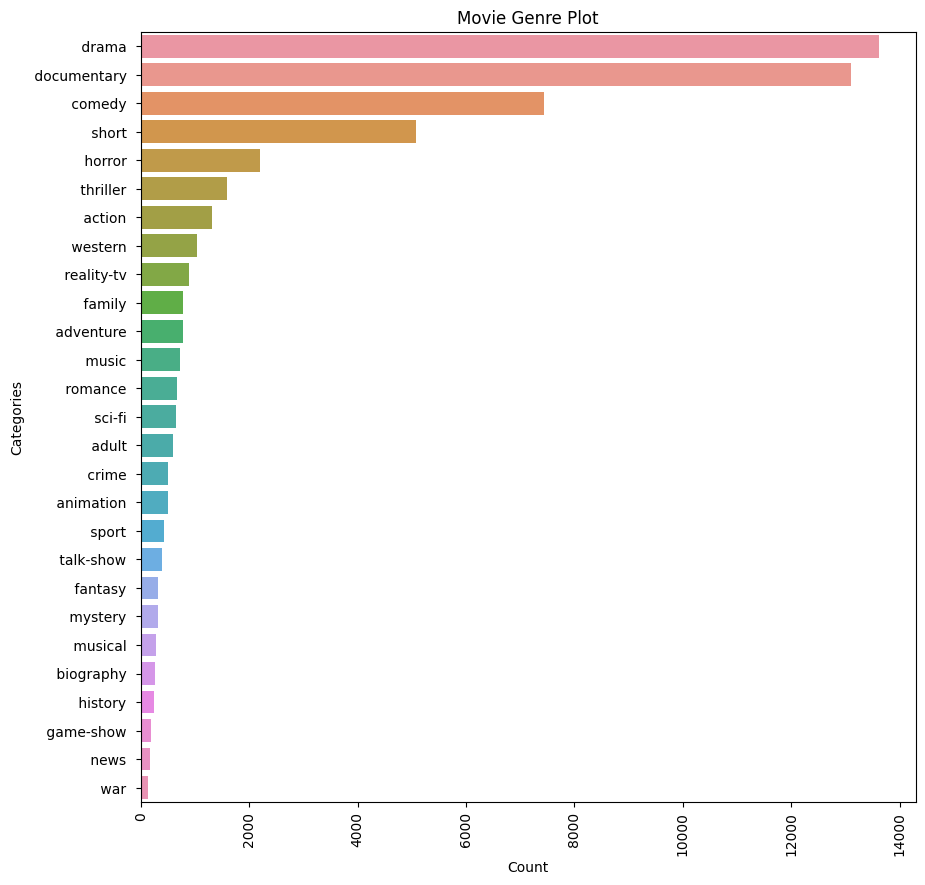

In [14]:
plt.figure(figsize=(10,10))
count1 = df_train.category.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Combine the training and testing datasets
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Display the first few rows of the combined dataset
print("-------------------------------------------------------------")
print(df_combined.head())
print("-------------------------------------------------------------")
# Get the shape of the combined dataset
print(f"Shape: {df_combined.shape}")
print("-------------------------------------------------------------")
# Get the total number of elements in the combined dataset
print(f"Size: {df_combined.size}")
print("-------------------------------------------------------------")
# Check for null values in the combined dataset
print("Null values:")
print(df_combined.isnull().any())
print("-------------------------------------------------------------")

# Get the count of non-null values in each column
print("Count of non-null values:")
print(df_combined.count())
print("-------------------------------------------------------------")

-------------------------------------------------------------
   SN                          movie_name       category  \
0   2                       Cupid (1997)       thriller    
1   3   Young, Wild and Wonderful (1980)          adult    
2   4              The Secret Sin (1915)          drama    
3   5             The Unrecovered (2007)          drama    
4   6             Quality Control (2011)    documentary    

                                             summary  
0   A brother and sister with a past incestuous r...  
1   As the bus empties the students for their fie...  
2   To help their unemployed father make ends mee...  
3   The film's title refers not only to the un-re...  
4   Quality Control consists of a series of 16mm ...  
-------------------------------------------------------------
Shape: (108412, 4)
-------------------------------------------------------------
Size: 433648
-------------------------------------------------------------
Null values:
SN            Fa

# LabelEncoder

In [16]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Encode the "category" column
df_combined["category"] = le.fit_transform(df_combined["category"].values)

# Encode the "movie_name" column
df_combined["movie_name"] = le.fit_transform(df_combined["movie_name"].values)

# Display the first few rows of the encoded dataset
print("----------------------------------------------------------------------------")
print(df_combined.head())

# Fill missing values in the "category" column with the mean
print("----------------------------------------------------------------------------")
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

# Get the count of non-null values in each column
print("Count of non-null values:")
print(df_combined.count())

# Check for duplicate rows in the dataset
print("----------------------------------------------------------------------------")
print("Duplicate rows:")
print(df_combined.duplicated().values.any())

----------------------------------------------------------------------------
   SN  movie_name  category                                            summary
0   2       31219        24   A brother and sister with a past incestuous r...
1   3      107506         1   As the bus empties the students for their fie...
2   4       96119         8   To help their unemployed father make ends mee...
3   5       97557         8   The film's title refers not only to the un-re...
4   6       74516         7   Quality Control consists of a series of 16mm ...
----------------------------------------------------------------------------
Count of non-null values:
SN            108412
movie_name    108412
category      108412
summary       108412
dtype: int64
----------------------------------------------------------------------------
Duplicate rows:
False


# TF-IDF

In [17]:
# Create a TF-IDF vectorizer instance
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the "confession" column and transform it into a matrix
X = vectorizer.fit_transform(df_combined["summary"])

# Display the first few rows of the original dataframe
print("Original dataframe:")
print("----------------------------------------------------------------------------")
print(df_combined.head())

# Extract the target variable (category) from the dataframe
y = df_combined["category"]

Original dataframe:
----------------------------------------------------------------------------
   SN  movie_name  category                                            summary
0   2       31219        24   A brother and sister with a past incestuous r...
1   3      107506         1   As the bus empties the students for their fie...
2   4       96119         8   To help their unemployed father make ends mee...
3   5       97557         8   The film's title refers not only to the un-re...
4   6       74516         7   Quality Control consists of a series of 16mm ...


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

In [19]:
# Create a Multinomial Naive Bayes model instance
naive_bayes_model = MultinomialNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = naive_bayes_model.predict(X_test)

# Evaluate the model's performance
print("Naive Bayes Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))
print(f"\nAccuracy: {accuracy_score(y_test, nb_predictions):.3f}")
print(f"R2 Score: {r2_score(y_test, nb_predictions):.3f}")

Naive Bayes Model:
Confusion Matrix:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create a Logistic Regression model instance
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
print("Logistic Regression Model:")
print("Confusion Matrix:")
print("TP | FN")
print("---------")
print(f"FP | TN {confusion_matrix(y_test, lr_predictions)}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))
print(f"\nAccuracy: {accuracy_score(y_test, lr_predictions):.3f}")

Logistic Regression Model:
Confusion Matrix:
TP | FN
---------
FP | TN [[   2    0    0    0    0    0    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0  251]
 [   0    3    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    1    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  143]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0  111    0    1   20    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1355]
 [   0    0    0    0    0    1    0    1    2    0    0   

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit